<a href="https://colab.research.google.com/github/Abd-bla/Abd-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.isna().sum()


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [9]:
df.describe(include='object').T


,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


In [10]:
df.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [30]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

In [31]:
print(list(df.columns))

['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [32]:
df = df.drop(columns=['customer_id'], errors='ignore')
print("dropped (if existed). shape:", df.shape)

dropped (if existed). shape: (10000, 11)


In [34]:
X = df.drop(columns=["churn"])
y = df["churn"]

In [35]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_cols, categorical_cols

(['credit_score',
  'age',
  'tenure',
  'balance',
  'products_number',
  'credit_card',
  'active_member',
  'estimated_salary'],
 ['country', 'gender'])

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


num_cols = numeric_cols
cat_cols = categorical_cols

num_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transform, num_cols),
    ("cat", cat_transform, cat_cols)
])


def eval_model(pipe, X_test, y_test):
    proba = pipe.predict_proba(X_test)[:,1]
    pred = pipe.predict(X_test)
    return {
        "auc": roc_auc_score(y_test, proba),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "f1": f1_score(y_test, pred)
    }


pipe_log = Pipeline([("pre", preprocessor), ("clf", LogisticRegression(max_iter=1000, random_state=42))])
pipe_log.fit(X_train, y_train)
metrics_log = eval_model(pipe_log, X_test, y_test)


pipe_xgb = Pipeline([("pre", preprocessor), ("clf", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))])
pipe_xgb.fit(X_train, y_train)
metrics_xgb = eval_model(pipe_xgb, X_test, y_test)


print("Logistic Regression metrics:", metrics_log)
print("XGBoost metrics:", metrics_xgb)


best_pipe = pipe_xgb if metrics_xgb["auc"] >= metrics_log["auc"] else pipe_log
import joblib
joblib.dump(best_pipe, "best_model.pkl")
print("Saved best model to best_model.pkl")

preprocessor.fit(X_train)
num_features = num_cols
ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
cat_feature_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = list(num_features) + cat_feature_names
print("Number of transformed features:", len(feature_names))
print("First 30 feature names:", feature_names[:30])

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:17:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression metrics: {'auc': np.float64(0.7747578086561138), 'precision': 0.5891472868217055, 'recall': 0.18673218673218672, 'f1': 0.2835820895522388}
XGBoost metrics: {'auc': np.float64(0.8391611950933985), 'precision': 0.6872852233676976, 'recall': 0.4914004914004914, 'f1': 0.5730659025787965}
Saved best model to best_model.pkl
Number of transformed features: 13
First 30 feature names: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'country_France', 'country_Germany', 'country_Spain', 'gender_Female', 'gender_Male']


In [38]:
import shap
import numpy as np


import joblib
best_model = joblib.load("best_model.pkl")

X_test_transformed = preprocessor.transform(X_test)


model = best_model.named_steps["clf"]


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed)

print("SHAP values shape:", np.array(shap_values).shape)


SHAP values shape: (2000, 13)


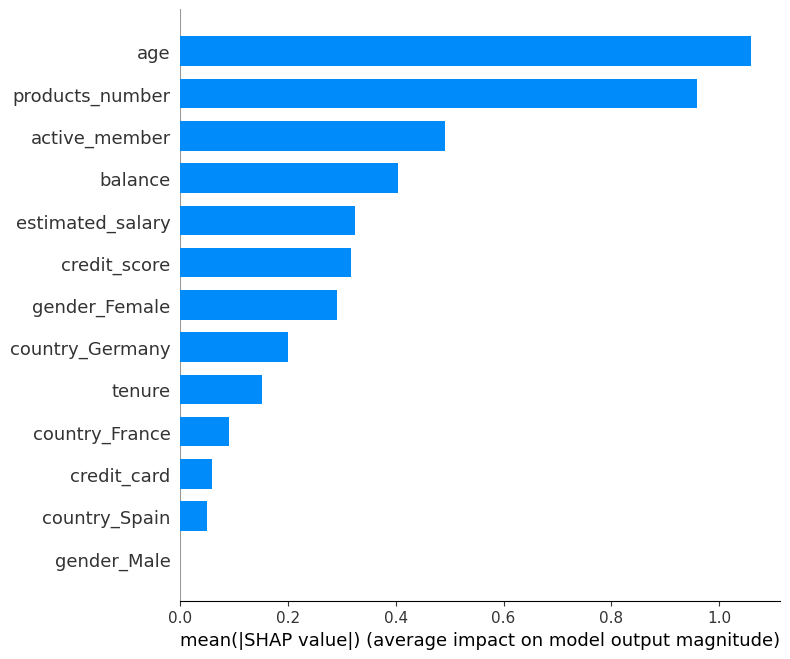

In [39]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names,
    plot_type="bar"
)


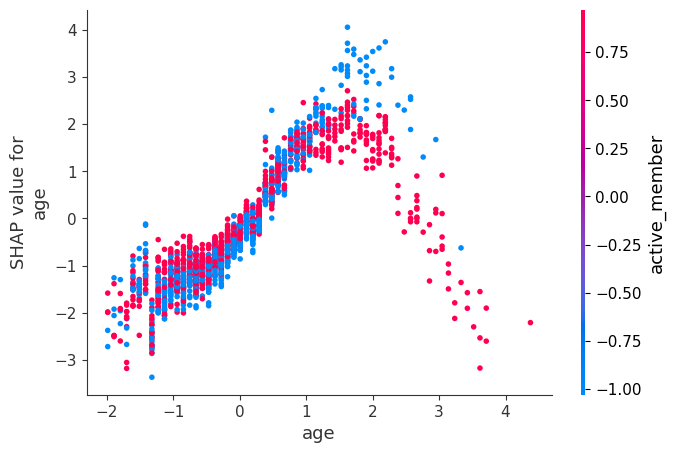

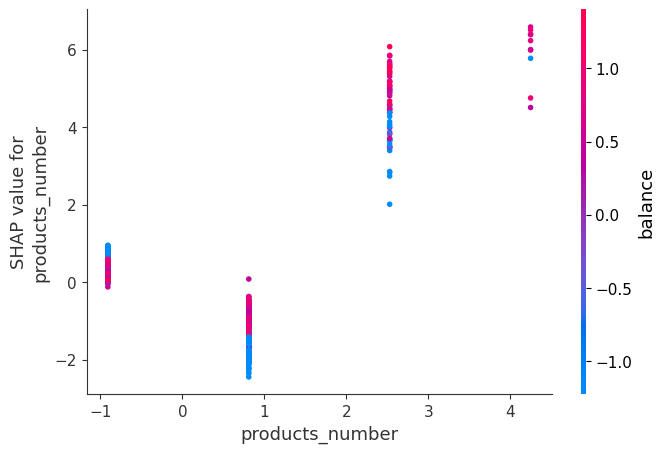

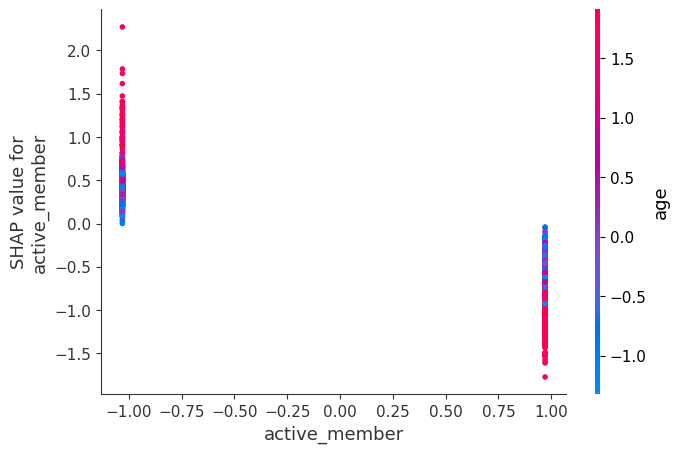

In [40]:
shap.dependence_plot("age", shap_values, X_test_transformed, feature_names=feature_names)
shap.dependence_plot("products_number", shap_values, X_test_transformed, feature_names=feature_names)
shap.dependence_plot("active_member", shap_values, X_test_transformed, feature_names=feature_names)


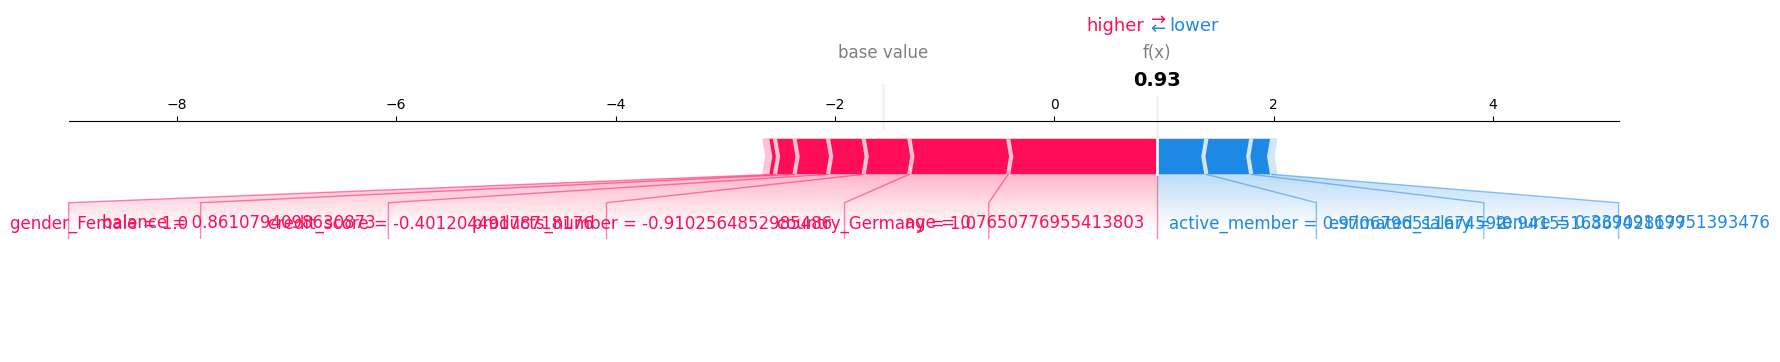

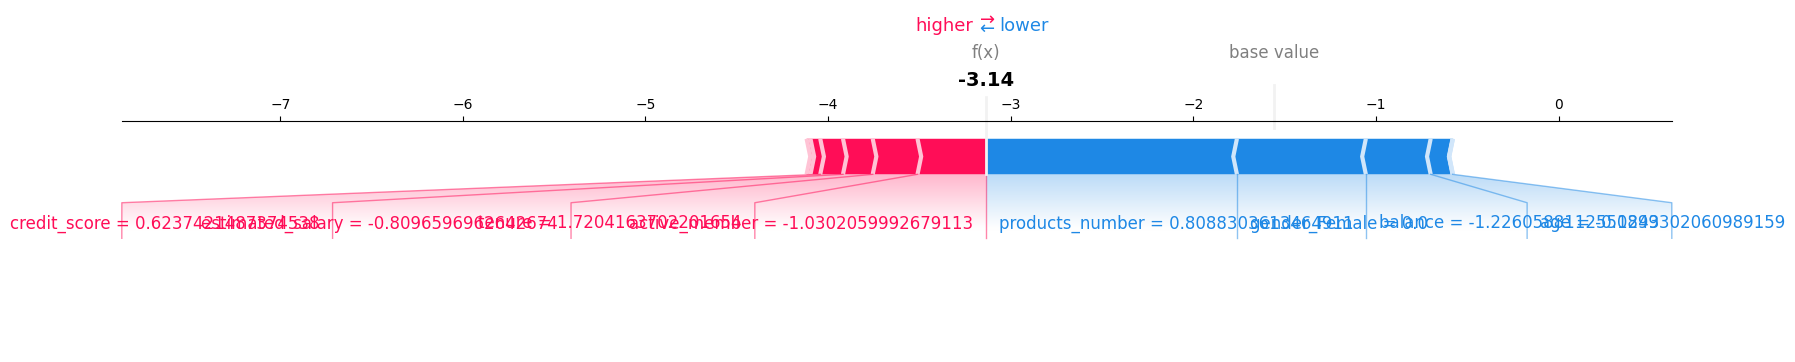

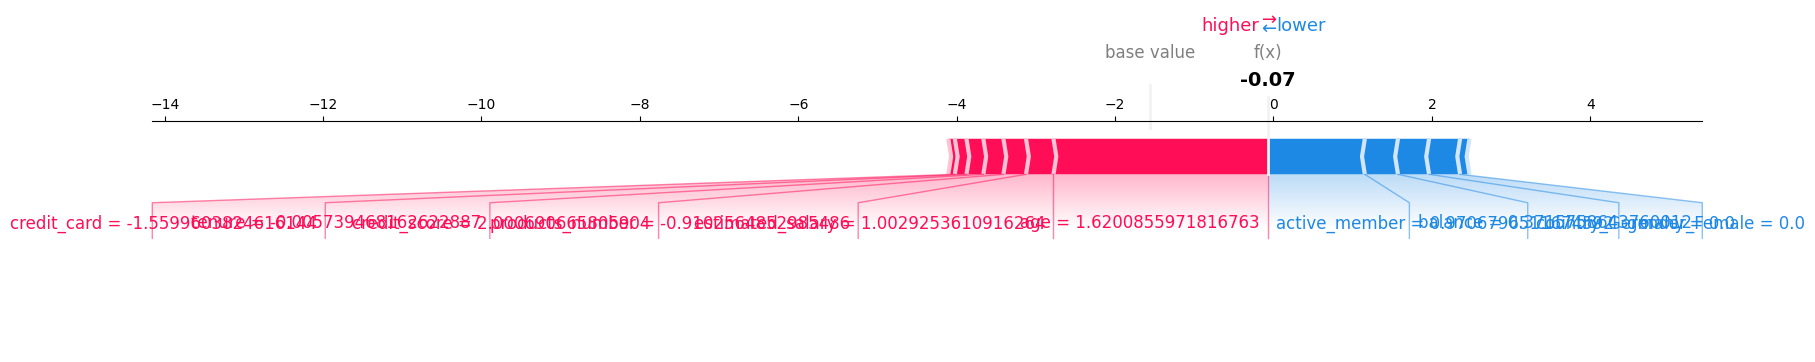

In [41]:
import random

indices = random.sample(range(len(X_test_transformed)), 3)

for idx in indices:
    force_plot = shap.force_plot(
        explainer.expected_value,
        shap_values[idx],
        X_test_transformed[idx],
        feature_names=feature_names,
        matplotlib=True
    )


In [44]:
import pandas as pd
import numpy as np

shap_df = pd.DataFrame(shap_values, columns=feature_names, index=X_test.index)

global_importance = shap_df.abs().mean().sort_values(ascending=False)
global_importance.head(10)

,0
age,1.059988
products_number,0.959392
active_member,0.492129
balance,0.404818
estimated_salary,0.324313
credit_score,0.316329
gender_Female,0.291369
country_Germany,0.199913
tenure,0.151756
country_France,0.089750


In [45]:
segment = X_test["products_number"] == 1
segment_shap = shap_df[segment].abs().mean().sort_values(ascending=False)

pd.DataFrame({
    "global_mean_abs_shap": global_importance,
    "segment_mean_abs_shap": segment_shap
}).fillna(0).sort_values("segment_mean_abs_shap", ascending=False).head(10)

,global_mean_abs_shap,segment_mean_abs_shap
age,1.059988,1.099226
active_member,0.492129,0.536238
products_number,0.959392,0.371318
estimated_salary,0.324313,0.332545
balance,0.404818,0.324939
credit_score,0.316329,0.309764
country_Germany,0.199913,0.294863
gender_Female,0.291369,0.255862
tenure,0.151756,0.146474
country_France,0.089750,0.103037


In [46]:
segment = X_test["active_member"] == 0
segment_shap = shap_df[segment].abs().mean().sort_values(ascending=False)

pd.DataFrame({
    "global_mean_abs_shap": global_importance,
    "segment_mean_abs_shap": segment_shap
}).fillna(0).sort_values("segment_mean_abs_shap", ascending=False).head(10)


,global_mean_abs_shap,segment_mean_abs_shap
age,1.059988,1.114677
products_number,0.959392,0.997128
active_member,0.492129,0.447686
balance,0.404818,0.405594
estimated_salary,0.324313,0.315055
credit_score,0.316329,0.304760
gender_Female,0.291369,0.275465
country_Germany,0.199913,0.190326
tenure,0.151756,0.148446
country_France,0.089750,0.099007


In [47]:
median_balance = X_test["balance"].median()
segment = X_test["balance"] > median_balance

segment_shap = shap_df[segment].abs().mean().sort_values(ascending=False)

pd.DataFrame({
    "global_mean_abs_shap": global_importance,
    "segment_mean_abs_shap": segment_shap
}).fillna(0).sort_values("segment_mean_abs_shap", ascending=False).head(10)


,global_mean_abs_shap,segment_mean_abs_shap
age,1.059988,1.055800
products_number,0.959392,0.728218
active_member,0.492129,0.501132
balance,0.404818,0.402291
country_Germany,0.199913,0.334800
estimated_salary,0.324313,0.331357
credit_score,0.316329,0.327495
gender_Female,0.291369,0.252488
tenure,0.151756,0.147413
country_France,0.089750,0.097189
